**이번 실습의 목표는**   
1. Google OCR API, keras-ocr, Tesseract 이상 3가지의 OCR 기능 사용해보기  

2. OCR을 활용한 서비스 기획하기

3. 명확하고 체계적인 기준으로 모델 평가하기

4. 최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과를 잘 정리하여 결론 도출하기

내가 생각한 **OCR 모델을 활용한 서비스**는   
**와인 라벨을 OCR로 읽어** 
- 와인명, 포도 품종, 빈티지, 등 정보 알림
- 내가 그동안 어떤 와인을 먹었는지 기록
- 기록을 통한 통계내기
- 통계를 통한 비슷한 와인추천 또는 색다른 와인 추천  

등 다양한 활동을 할 수 있도록 도와주는 서비스를 만들어보려고 한다.  


---

**성능 TEST 순서**로는 

1. 보편적인 영어로 작성된 라벨을 읽혀보고 성능을 평가함  

2. 한국와인의 라벨을 읽혀보고 성능을 평가함

3. 둘의 조합으로 성능이 좋은 OCR 모델을 선정하고 기울어진 것, 가려진 것 등 다양한 사진을 넣어 텍스트를 추출함

4. 텍스트를 리스트화 하여 간단한 테스트를 진행함


### 힙쟁이가 되고싶어 라벨만 보고 맛있어보이는 와인 주워오는 당신!! 이제 알고먹자~~~~

### 간단하게 와인의 기본중심을 세워주는 **"와추형"(와인 추천해주는 형)**

레츠 기릿!!!

## STEP 1. 라이브러리 불러오기
---

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import io
import numpy as np
import platform
from PIL import ImageFont, ImageDraw, Image
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import keras_ocr
import pytesseract
import pandas as pd


## STEP 1. KERAS-OCR 사용해보기
---


### 1) 영어 라벨 테스트

In [ ]:
############ KERAS-OCR INSTALL ################
!pip install -q keras-ocr

     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 930 kB 52.7 MB/s 
     |████████████████████████████████| 604 kB 70.5 MB/s 
     |████████████████████████████████| 9.5 MB 37.0 MB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 


In [ ]:
############ KERAS - pipeline #################
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
image_fiels = [
    '/content/drive/MyDrive/COLAB_data/Wine/20.jpg',
    '/content/drive/MyDrive/COLAB_data/Wine/19.jpg',
    '/content/drive/MyDrive/COLAB_data/Wine/15.jpg',
    '/content/drive/MyDrive/COLAB_data/Wine/11.jpg',
    '/content/drive/MyDrive/COLAB_data/Wine/10.jpg',
    '/content/drive/MyDrive/COLAB_data/Wine/7.jpg'
]

images = [keras_ocr.tools.read(url) for url in image_fiels]
prediction_groups = [pipeline.recognize([url]) for url in image_fiels]

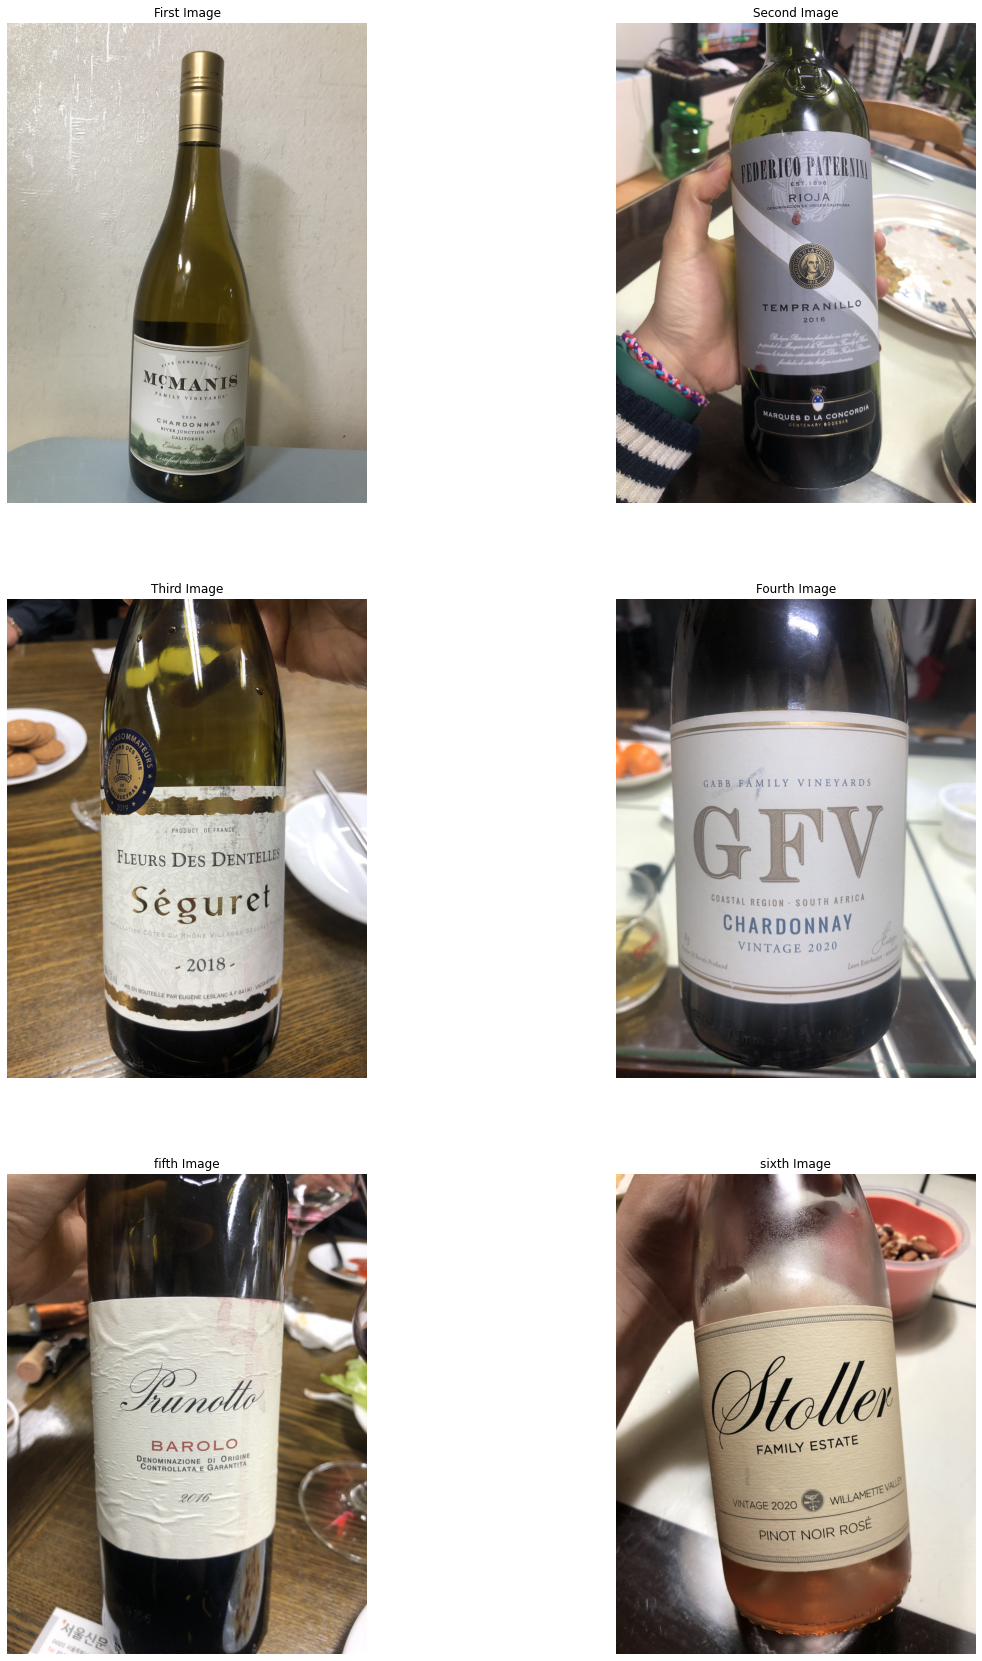

In [ ]:
fig = plt.figure(figsize=(20,30))

fig.add_subplot(3,2,1)
plt.imshow(images[0])
plt.axis('off')
plt.title("First Image")

fig.add_subplot(3,2,2)
plt.imshow(images[1])
plt.axis('off')
plt.title("Second Image")

fig.add_subplot(3,2,3)
plt.imshow(images[2])
plt.axis('off')
plt.title("Third Image")

fig.add_subplot(3,2,4)
plt.imshow(images[3])
plt.axis('off')
plt.title("Fourth Image");

fig.add_subplot(3,2,5)
plt.imshow(images[4])
plt.axis('off')
plt.title("fifth Image");

fig.add_subplot(3,2,6)
plt.imshow(images[5])
plt.axis('off')
plt.title("sixth Image");


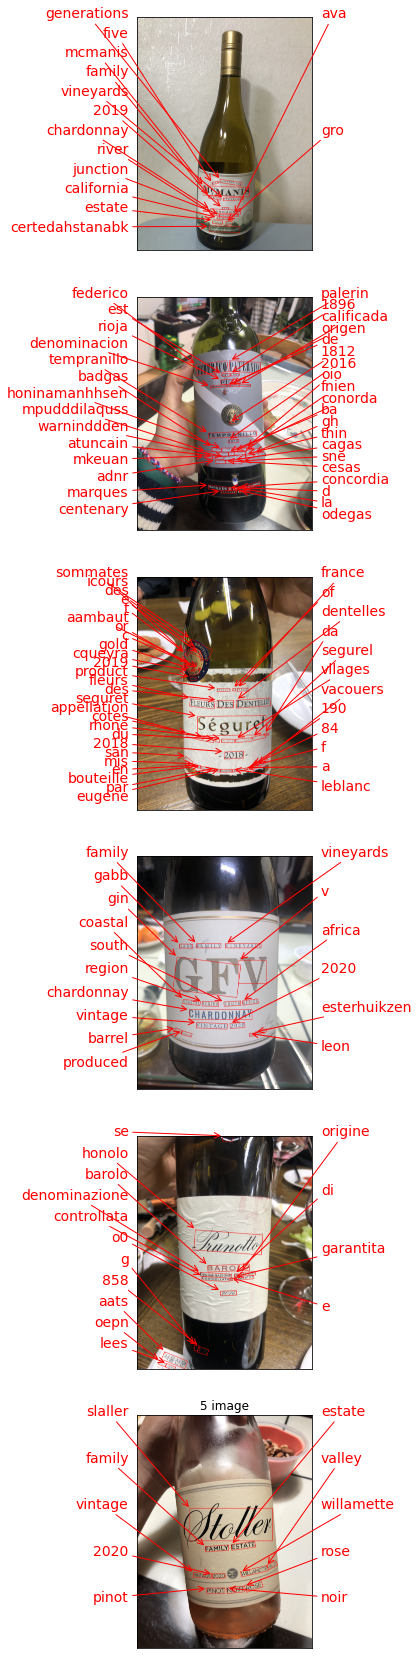

In [ ]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(30, 30))
for idx, ax in enumerate(axs):
    plt.title("{} image".format(idx))
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

영어라 그런지 나름 잘 읽어내는 것을 확인할 수 있다.  

하지만 필기체는 잘 읽는 것도 있고, 아닌 것도 있어서 아쉽긴하다.   

그래도 와인병의 특성상 옆으로 기울어진 글씨나, 병 둘래를 타고 써진 굴곡진 글씨도 잘 캐치해서 읽는 것을 알 수 있다.

그럼 시험삼아 한국와인의 라벨도 읽혀본다.


### 2) 한국 와인 라벨(한국어) 테스트

In [ ]:
############## 한국어 인식 테스트 ##################
image_fiels_ko = [
    '/content/drive/MyDrive/COLAB_data/Wine/ko_1.jpg',
    '/content/drive/MyDrive/COLAB_data/Wine/ko_2.jpg',
    '/content/drive/MyDrive/COLAB_data/Wine/ko_3.jpg',
    '/content/drive/MyDrive/COLAB_data/Wine/ko_4.png',
    '/content/drive/MyDrive/COLAB_data/Wine/ko_5.jpg',
    '/content/drive/MyDrive/COLAB_data/Wine/ko_6.png'
]

images_ko = [keras_ocr.tools.read(url) for url in image_fiels_ko]
prediction_groups_ko = [pipeline.recognize([url]) for url in image_fiels_ko]

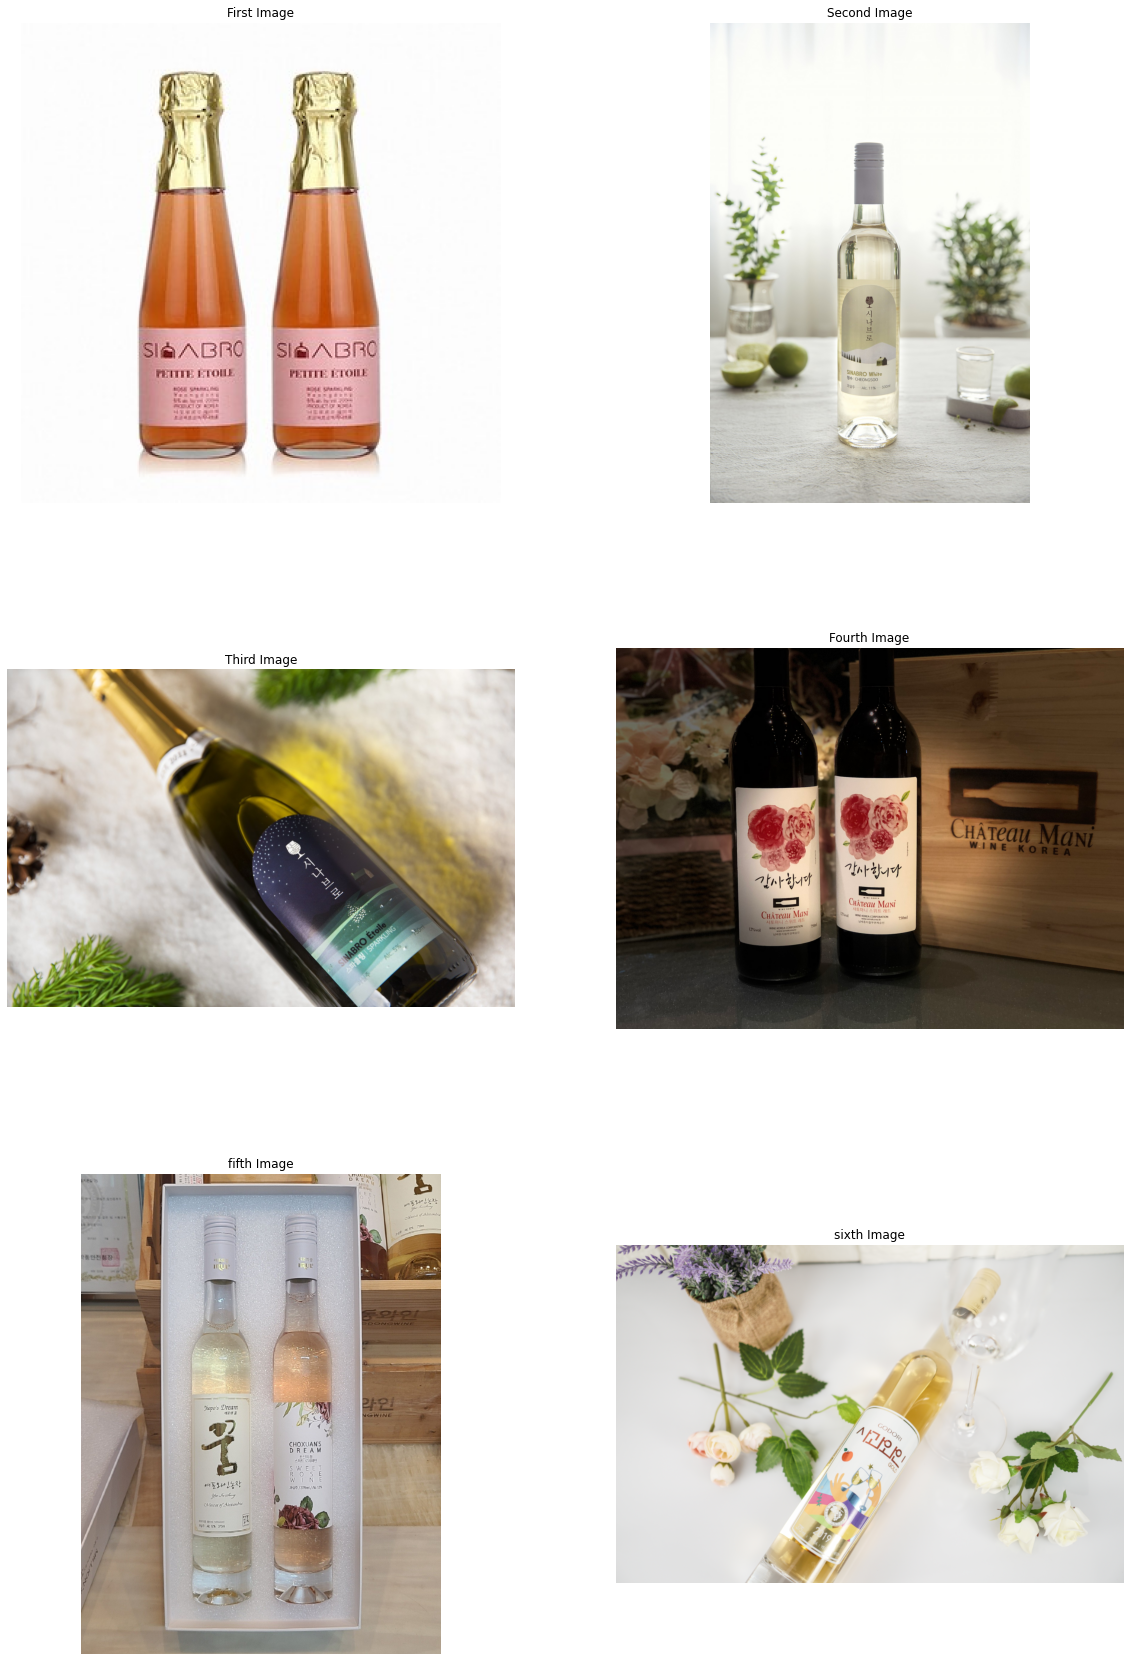

In [ ]:
################## 시각화 하기 #######################
fig = plt.figure(figsize=(20,30))

fig.add_subplot(3,2,1)
plt.imshow(images_ko[0])
plt.axis('off')
plt.title("First Image")

fig.add_subplot(3,2,2)
plt.imshow(images_ko[1])
plt.axis('off')
plt.title("Second Image")

fig.add_subplot(3,2,3)
plt.imshow(images_ko[2])
plt.axis('off')
plt.title("Third Image")

fig.add_subplot(3,2,4)
plt.imshow(images_ko[3])
plt.axis('off')
plt.title("Fourth Image");

fig.add_subplot(3,2,5)
plt.imshow(images_ko[4])
plt.axis('off')
plt.title("fifth Image");

fig.add_subplot(3,2,6)
plt.imshow(images_ko[5])
plt.axis('off')
plt.title("sixth Image");


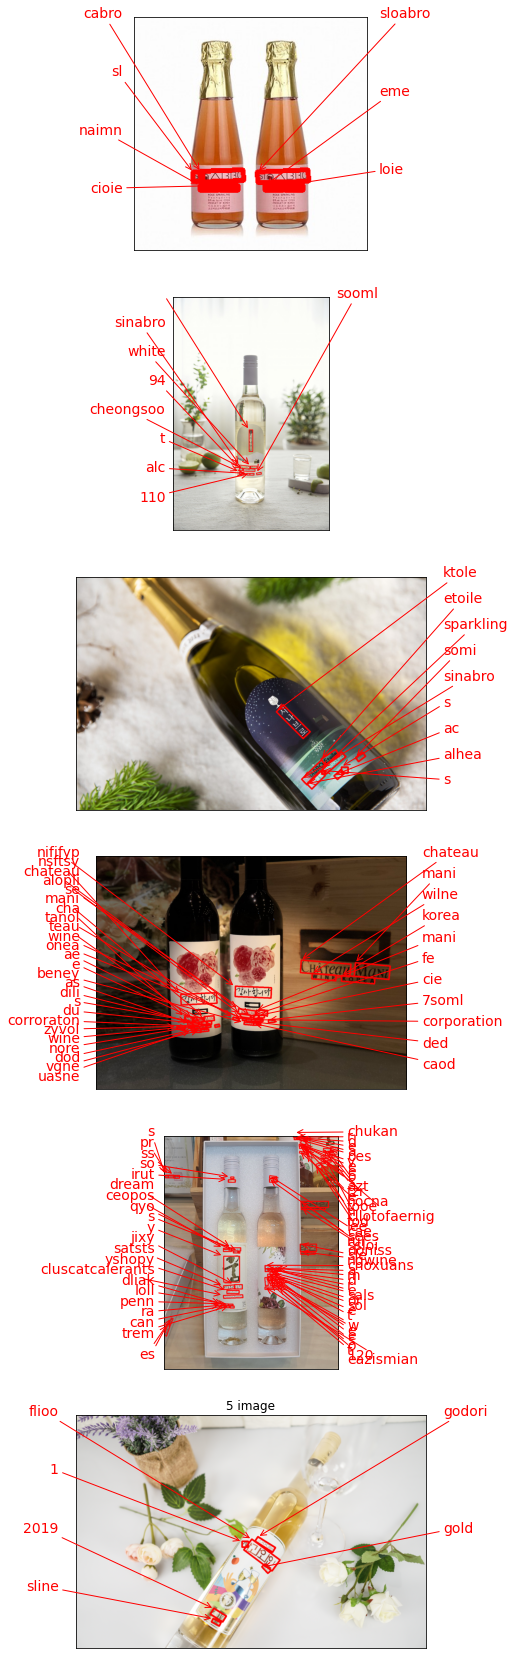

In [ ]:
############## 인식결과 나타내기 ##################
fig, axs = plt.subplots(nrows=len(images_ko), figsize=(30,30))
for idx, ax in enumerate(axs):
    plt.title("{} image".format(idx))
    keras_ocr.tools.drawAnnotations(image=images_ko[idx], 
                                    predictions=prediction_groups_ko[idx][0], ax=ax)

한국어를 detection해서 BOX로 표현하긴 하지만, 한국어는 제대로 인식하지 못하고 엉뚱한 영어로 나타내는 것을 알 수 있다.  

하지만 기울어진 병의 라벨도 잘 읽는 것을 보니 확실히 성능은 좋은 것 같다.

## STEP 2. Tesseract 사용해보기

---

- tessdata를 제공하는데, 이는 LSTM으로 학습한 내용이라고 한다. 어디 잘하는지 기대해보지.

- [pytesseract 0.3.9 - 공식페이지](https://pypi.org/project/pytesseract/)


In [ ]:
! pip install pytesseract
!sudo apt install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 38.2 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,667 kB/s)
debconf: unable to initi

### 1) 영어 라벨 테스트

---

위에서 쓴 파일을 그대로 적용해봅니다.

In [ ]:
tesseract_preds = []
for files in image_fiels:
    img = cv2.imread(files)
    tesseract_preds.append(pytesseract.image_to_string(img))

     
 
       

2019
“HARDONNAY
RIVER JUNCTION AVA
CALIFORNIA



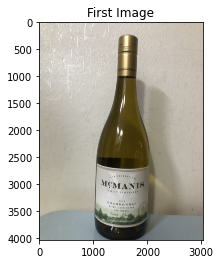

In [ ]:
print(tesseract_preds[0])
plt.imshow(images[0])
plt.title("First Image");

SHARDONAY에서 S를 "로 인식한다고요..?

 

   
 
  

   

x

RICO VATERM

_ FSH
igST.1896

1\ Sh
\ RIOJA
® INABIGNOE ORIGEN CALIFICADA

oe

   
   
 
     

Fe id

   

woettee
erent

-o-—<9 ,

v lta
ARQUES DLA concer i

NTENARY PY) lake y

 



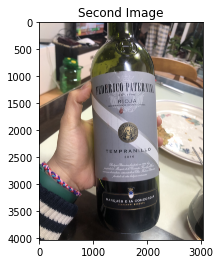

In [ ]:
print(tesseract_preds[1])
plt.imshow(images[1])
plt.title("Second Image");

처참......  
제대로 된게 1도 없습니다...

ts

PRODUCT OF FRANCE

FLEURS DES DENTELB

lv

EN By
AY
TEILU PAR EUGENE LEBLANS A

 



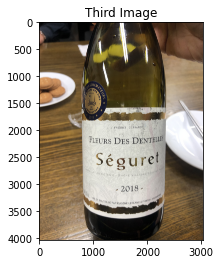

In [ ]:
print(tesseract_preds[2])
plt.imshow(images[2])
plt.title("Third Image");

작은 영어는 잘 뽑아낸 반면, 크게 써있는 불어? 는 인식하지 못하였습니다.  
또한 굴곡진 부분의 글씨도 인식하지 못하네요.

 

;
ry A
COAST: r pits
ANITA YT yr er i i r até
AQDIAL REI !

CHARDONNAY

VINTAGE 2020

 



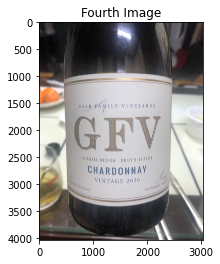

In [ ]:
print(tesseract_preds[3])
plt.imshow(images[3])
plt.title("Fourth Image")



누가봐도 영어로 크게 적혀있는 GFV는 인식하지 못하고 아래 CHARDONNAY와 빈티지는 잘 인식했습니다. 

이상한 폰트는 인식하지 못하는 것 같습니다.

BAROLO

DENOMINAZIONE DI! ORIGIN

CONTROLLATA E GARANTIT!

LOTO

 



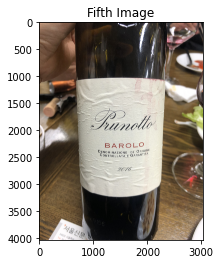

In [ ]:
print(tesseract_preds[4])
plt.imshow(images[4])
plt.title("Fifth Image");

2016 빈티지를 LOTO로 읽습니다...

    

erin) ML

  
 

  

Wa

TTT
7]
TMT



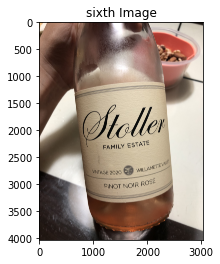

In [ ]:
print(tesseract_preds[5])
plt.imshow(images[5])
plt.title("sixth Image");

인식을 잘하는 것
- 글자의 각도가 틀어지지 않은 것
- 노이즈가 많이 없는 것
- 일반 폰트로 써진 글자

인식하지 못하는 것
- 기울여진 그림
- 익숙하지 않은 폰트 (필기체 포함)
- 영문이 아닌 것
- 작은 글씨

이렇게 정리할 수 있을 것 같습니다.  

문자인식 성능은 굉장히 떨어집니다. 반면 읽은 문자를 tesseract_preds 리스트로 묶어서 저장해주니 나중에 결과 데이터를 가공할 때는 좋을 것 같습니다... (근데 뭐 잘 읽어줘야 써먹기도하지....쩝....)  

### 2) 한국 와인 라벨(한글) 테스트

---
영어부터 성능이 좋지 않은 것을 알았기에 별기대없이 TEST해봅니다.

- 한글을 테스트하기 위해 Tesseract-ocr 깃허브에서 `kor.traineddata`를 다운받아 tesseract 폴더에 넣어줍니다.

-[tesseract-ocr-github](https://github.com/tesseract-ocr/tessdata/)

In [ ]:
tesseract_preds_ko = []
for files in image_fiels_ko:
    img_ko = cv2.imread(files)
    tesseract_preds_ko.append(pytesseract.image_to_string(img_ko, lang = 'eng+kor'))# 언어 영어 + 한글로 변경

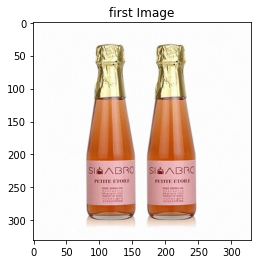

In [ ]:
print(tesseract_preds_ko[0])
plt.imshow(images_ko[0])
plt.title("first Image");

SINABRO White
| CHEONGSOO

 



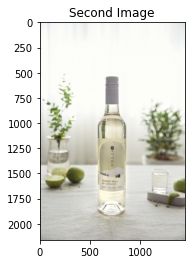

In [ ]:
print(tesseract_preds_ko[1])
plt.imshow(images_ko[1])
plt.title("Second Image");

음... 2개를 꺼내봤는데, 한글은 잘 인식하지 못하는 것 같습니다. 사진 없이 우선 한글을 뽑는지 `tesseract_preds_ko`의 전체 리스트를 뽑아봅니다.

In [ ]:
############ 한글 라벨 OCR 전체 리스트 ###############
print(tesseract_preds_ko)

[' \n\x0c', 'SINABRO White\n| CHEONGSOO\n\n \n\x0c', ' \n\x0c', ' \n\x0c', "eopo's Dream\n옹\n\n \n\n여 포 와 인 송 장 1\n~~\n\nNfiuseat of Alerantrt\n\n \n\x0c", ' \n\x0c']


오 여포와인을 추출한게 보입니다~!!! 

eopo's Dream
옹

 

여 포 와 인 송 장 1
~~

Nfiuseat of Alerantrt

 



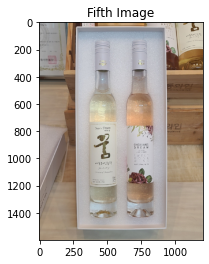

In [ ]:
print(tesseract_preds_ko[4])
plt.imshow(images_ko[4])
plt.title("Fifth Image");

신기하지만 별 쓸만하지 않은건 동일하네용...   

우선 Tesseract-ocr은 고려대상에서 제거합니다. 퉤!

## STEP 3. Google OCR 사용해보기

---
google cloud vision을 설치하여 google ocr을 사용해봅니다

In [ ]:
!pip install virtualenv
!virtualenv aaa
!source aaa/bin/activate
!aaa/bin/pip install google-cloud-vision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 27.4 MB/s 
     |████████████████████████████████| 461 kB 80.7 MB/s 
created virtual environment CPython3.7.13.final.0-64 in 504ms
  creator CPython3Posix(dest=/content/aaa, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==22.0.4, setuptools==62.1.0, wheel==0.37.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.4/385.4 KB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4

In [ ]:
import sys
sys.path.append('/content/aaa/lib/python3.7/site-packages')
from google.cloud import vision 

In [ ]:
import io
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  "/content/drive/MyDrive/COLAB_data/my_google_api_key.json"


In [ ]:
googleocr=[]
detected_text = []
def detect_text(path):
    """Detects text in the file."""
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    googleocr.append(len(texts))
    # print(len(texts))
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))
        detected_text.append(text.description)

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    # print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [ ]:
detected_text_list = []
for files in image_fiels:
    txtfile = files
    detected_text_list.append(detect_text(txtfile))

Texts:

"hu
FIVE GENERATIONS
MCMANIS
FAMILY VINEYARDS'
2019
CHARDONNAY
RIVER JUNCTION AVA
CALIFORNIA
Estate - Gro
Certified Sustainable"

"hu"

"FIVE"

"GENERATIONS"

"MCMANIS"

"FAMILY"

"VINEYARDS"

"'"

"2019"

"CHARDONNAY"

"RIVER"

"JUNCTION"

"AVA"

"CALIFORNIA"

"Estate"

"-"

"Gro"

"Certified"

"Sustainable"
Texts:

"6
FEDERICO PATERNIM
EST. 1896
RIOJA
DENOMINACIÓN DE ORIGEN CALIFICADA
LA
ES D
MA
CONC
ORDIA
1812
TEMPRANILLO
2016
Bedegas Paternina fundadas en 1896, hey
propiedad de Marquis de la Concordia Family of Winds
van la tradición vitivinicola de Don Federico Petres
fundador de estas bodegas centenarios.
B
MARQUES D LA CONCORDIA
CENTENARY BODEGAS
x"

"6"

"FEDERICO"

"PATERNIM"

"EST"

"."

"1896"

"RIOJA"

"DENOMINACIÓN"

"DE"

"ORIGEN"

"CALIFICADA"

"LA"

"ES"

"D"

"MA"

"CONC"

"ORDIA"

"1812"

"TEMPRANILLO"

"2016"

"Bedegas"

"Paternina"

"fundadas"

"en"

"1896"

","

"hey"

"propiedad"

"de"

"Marquis"

"de"

"la"

"Concordia"

"Family"

"of"

"Winds"

"van"

"l

ServiceUnavailable: ignored

오 뭔가 많이 잘 뽑아낸 것을 알 수 있습니다.   
하나하나 한번 확인해봅시다

Texts:

"hu
FIVE GENERATIONS
MCMANIS
FAMILY VINEYARDS'
2019
CHARDONNAY
RIVER JUNCTION AVA
CALIFORNIA
Estate - Gro
Certified Sustainable"

"hu"

"FIVE"

"GENERATIONS"

"MCMANIS"

"FAMILY"

"VINEYARDS"

"'"

"2019"

"CHARDONNAY"

"RIVER"

"JUNCTION"

"AVA"

"CALIFORNIA"

"Estate"

"-"

"Gro"

"Certified"

"Sustainable"


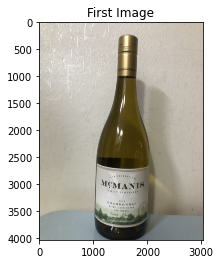

In [ ]:
txtfile = image_fiels[0]
detect_text(txtfile)
plt.imshow(images[0])
plt.title("First Image");

첫번째 이미지에서 
- hu
- FIVE GENERATIONS
- MCMANIS
- FAMILY VINEYARDS'
- 2019
- CHARDONNAY
- RIVER JUNCTION AVA
- CALIFORNIA
- Estate - Gro
- Certified Sustainable

이렇게 작은 글씨까지 잘 뽑아내는 것을 알 수 있습니다!   
야빠리 구글찡...!!!!!

몇개만 더 확인해보고 한글로 넘어갑시다!


Texts:

"CONSO
JURY
HRONO
VINS
SOMMATEURS
RAIMBAUT
OR
GOLD
EYRAS
★
✰
2019
PRODUCT OF FRANCE
FLEURS DES DENTELLES
Seguret
APPELLATION CÔTES DU RHÔNE VILLAGES SEGURET PRO
- 2018
MIS EN BOUTEILLE PAR EUGÈNE LEBLANC À F.84190 VACQUEYRAS"

"CONSO"

"JURY"

"HRONO"

"VINS"

"SOMMATEURS"

"RAIMBAUT"

"OR"

"GOLD"

"EYRAS"

"★"

"✰"

"2019"

"PRODUCT"

"OF"

"FRANCE"

"FLEURS"

"DES"

"DENTELLES"

"Seguret"

"APPELLATION"

"CÔTES"

"DU"

"RHÔNE"

"VILLAGES"

"SEGURET"

"PRO"

"-"

"2018"

"MIS"

"EN"

"BOUTEILLE"

"PAR"

"EUGÈNE"

"LEBLANC"

"À"

"F.84190"

"VACQUEYRAS"


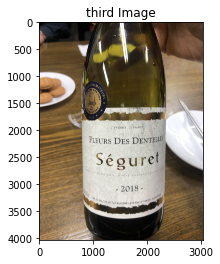

In [ ]:
txtfile = image_fiels[2]
detect_text(txtfile)
plt.imshow(images[2])
plt.title("third Image");

"CONSO  
JURY  
HRONO  
VINS  
SOMMATEURS  
RAIMBAUT   
OR  
GOLD  
EYRAS  
★  
✰  
2019  
PRODUCT OF FRANCE  
FLEURS DES DENTELLES  
Seguret  
APPELLATION CÔTES DU RHÔNE VILLAGES SEGURET PRO  
'- 2018  
MIS EN BOUTEILLE PAR EUGÈNE LEBLANC À F.84190   VACQUEYRAS"  

---
별은 왜나왔나 했더니 와인이 상받았다고 표시한 스티커에 있는 내용까지 읽은 것이었습니다. wow...  

굴곡이 있어 짤리긴 했으나, 별모양까지 확실하게 뽑아냅니다.  
또한 Seguret은 그냥 영어로 뽑았으나, CÔTES DU RHÔNE 처럼 불어까지 완벽하게 뽑아내는 것을 알 수 있습니다.   
역시 갓구글.....!!!!

Texts:

"서울신문
Pranotto
BAROLO
DENOMINAZIONE DI ORIGINE
CONTROLLATA E GARANTITA
2016"

"서울"

"신문"

"Pranotto"

"BAROLO"

"DENOMINAZIONE"

"DI"

"ORIGINE"

"CONTROLLATA"

"E"

"GARANTITA"

"2016"


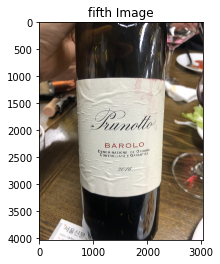

In [ ]:
txtfile = image_fiels[4]
detect_text(txtfile)
plt.imshow(images[4])
plt.title("fifth Image");

아니.... 서울신문이 왜나왔나 했더니....  
와인병 밑에 받았던 서울신문 명함을 읽었습니다.....세에상에.....  
리 얼 갓 구 글.......

Texts:

"Stoller
FAMILY ESTATE
WILLAMETTE VALLEY
PINOT NOIR ROSÉ
VINTAGE 2020"

"Stoller"

"FAMILY"

"ESTATE"

"WILLAMETTE"

"VALLEY"

"PINOT"

"NOIR"

"ROSÉ"

"VINTAGE"

"2020"


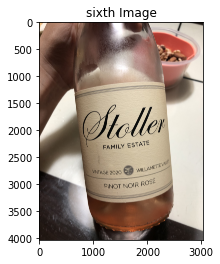

In [ ]:
txtfile = image_fiels[5]
detect_text(txtfile)
plt.imshow(images[5])
plt.title("sixth Image");

"Stoller  
FAMILY ESTATE  
WILLAMETTE VALLEY  
PINOT NOIR ROSÉ  
VINTAGE 2020"  

---

이야.... 역시.... 대단합니다.... 필기체까지 완벽하게 뽑아내는 것을 알 수 있네요... wow...  

어디 흥분되는 마음으로 한글 라벨을 읽히도록합시다!!!!

### 2) 한국 와인 라벨(한글)테스트

In [ ]:
detected_text_list_ko = []
for files_ko in image_fiels_ko:
    txtfile_ko = files_ko
    detected_text_list_ko.append(detect_text(txtfile_ko))

Texts:

"SIAABRO
PETITE ETOILE
ESPAG
YO
PCT OF K
SURARASH
PROSEDE
SIAABRO
PETITE ÉTOILE
SAK
wwwwwww
Maline
F
rick
ANKARAEN"

"SIAABRO"

"PETITE"

"ETOILE"

"ESPAG"

"YO"

"PCT"

"OF"

"K"

"SURARASH"

"PROSEDE"

"SIAABRO"

"PETITE"

"ÉTOILE"

"SAK"

"wwwwwww"

"Maline"

"F"

"rick"

"ANKARAEN"
Texts:

"ㅅ시나브로
SINABRO White
청수 CHEONGSO0
과실주 Alc. 11% 500ml"

"ㅅ"

"시나브로"

"SINABRO"

"White"

"청수"

"CHEONGSO0"

"과실주"

"Alc"

"."

"11"

"%"

"500ml"
Texts:

"* 시나브로
SINABRO Étoile
스파클링 | SPARKLING
Alc.5%
150ml"

"*"

"시나브로"

"SINABRO"

"Étoile"

"스파클링"

"|"

"SPARKLING"

"Alc.5"

"%"

"150ml"
Texts:

"감사합니다
CHÂTEAU MANI
샤토마니 스위트 레드
WINE KOREA CORPORATION
www.winekoreak
납세증지첨부언제인
12%vol
70ml
감사합니다
CHÂTEAU MANI
샤토마니 스위트 레드
WINE KOREA CORPORATION
www.winekorea k
납세증지첨부언제승인
12%vol
750ml
Chareau Mani
WINE KOREA"

"감사"

"합니다"

"CHÂTEAU"

"MANI"

"샤토"

"마니"

"스위트"

"레드"

"WINE"

"KOREA"

"CORPORATION"

"www.winekoreak"

"납세"

"증지"

"첨부"

"언제"

"인"

"12"

"%"

"vol"

"70ml"

"감사"

"합니다"

"CHÂTEAU"

"

이야 딱봐도 훌륭하게 뽑아내는 것을 알 수 있습니다. 어디 몇개만 뽑아볼까요!

Texts:

"ㅅ시나브로
SINABRO White
청수 CHEONGSO0
과실주 Alc. 11% 500ml"

"ㅅ"

"시나브로"

"SINABRO"

"White"

"청수"

"CHEONGSO0"

"과실주"

"Alc"

"."

"11"

"%"

"500ml"


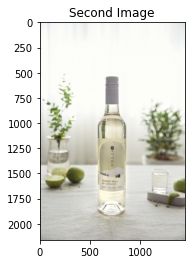

In [ ]:
txtfile_ko = image_fiels_ko[1]
detect_text(txtfile_ko)
plt.imshow(images_ko[1])
plt.title("Second Image");

"ㅅ시나브로  
SINABRO White  
청수 CHEONGSO0  
과실주 Alc. 11% 500ml"  

WOW..... 외쳐 갓구글,.....!!!!!!!!!!  
지금까지 OCR 했던 것 중에 가장 좋습니다!!!

Texts:

"지길 75
약품안전청장
WELLO~
CEDES
포의
IRUP
Jeopo's Dream
여포의 꿈
움
여포와인농장
Yoo In Sung
Muscat of Alexandria
화이트 12
과실주 Alc 12% 375
고체
여포의꿈
IRUL
CHOXUAN'S
DREAM
조선의 꿈
스위트 로제와인
SWEET
ROSE
WINE
과실주/375ml/Alb 12%
JAN'S
DREAM
조선의용
교사인
VEE
0
IN
여포와인농장
You In Sung
Muscit of Alexandria
Alc 12% 750ml
SDONGWINE
라인
NGWINE"

"지길"

"75"

"약품"

"안전"

"청장"

"WELLO"

"~"

"CEDES"

"포"

"의"

"IRUP"

"Jeopo's"

"Dream"

"여포"

"의"

"꿈"

"움"

"여포"

"와인"

"농장"

"Yoo"

"In"

"Sung"

"Muscat"

"of"

"Alexandria"

"화이트"

"12"

"과실주"

"Alc"

"12"

"%"

"375"

"고체"

"여포"

"의"

"꿈"

"IRUL"

"CHOXUAN'S"

"DREAM"

"조선"

"의"

"꿈"

"스위트"

"로제"

"와인"

"SWEET"

"ROSE"

"WINE"

"과실주"

"/"

"375ml"

"/"

"Alb"

"12"

"%"

"JAN'S"

"DREAM"

"조선"

"의용"

"교사"

"인"

"VEE"

"0"

"IN"

"여포"

"와인"

"농장"

"You"

"In"

"Sung"

"Muscit"

"of"

"Alexandria"

"Alc"

"12"

"%"

"750ml"

"SDONGWINE"

"라인"

"NGWINE"


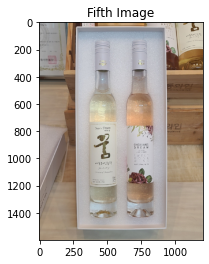

In [ ]:
txtfile_ko = image_fiels_ko[4]
detect_text(txtfile_ko)
plt.imshow(images_ko[4])
plt.title("Fifth Image");

이야 저 뒤에 있는 상장의 "약품안전청장" 까지 읽어냅니다...   

대신 특이한 폰트인 '꿈' 같은 경우엔, 용, 움 같이 읽어낸 것이 보입니다.  

또 많은 단어를 읽었으나 어디서 읽은건지 모르겠는 단어들도 속속들이 나옵니다.   

**Google OCR**을 쓸 때는 성능이 너무 좋으니, **확실히 읽히고 싶은 글자만 나올 수 있도록 찍는 것**이 단점 아닌 단점이 될 것 같네요.  

----

하나만 더해보고 마무리합시다...!

## STEP 4. EASY OCR 사용해보기

---
갓구글로 갈 것 같긴하지만, 이지오씨알도 괜찮다고하니 한번 써봅시다!

In [ ]:
! pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 30 kB/s 
     |████████████████████████████████| 47.6 MB 203 kB/s 


In [ ]:
import cv2
import easyocr
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

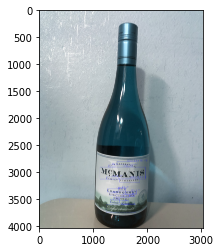

In [ ]:
reader = easyocr.Reader(['ko', 'en'])
result =  reader.readtext('/content/drive/MyDrive/COLAB_data/Wine/20.jpg')

img = cv2.imread('/content/drive/MyDrive/COLAB_data/Wine/20.jpg')

img = Image.fromarray(img)
font = ImageFont.truetype("malgun.ttf", 40)
draw = ImageDraw.Draw(img)

for i in result:
  x = i[0][0][0]
  y = i[0][0][1]
  w = i[0][1][0] - i[0][0][0]
  h = i[0][2][1] - i[0][1][1]

  draw.rectangle(((x, y), (x+w, y+h)), outline="blue", width=2)
  draw.text((int((x+x+w)/2), y-40), str(i[1]), font=font, fill="blue")

plt.imshow(img)
plt.show()

In [ ]:
reader = easyocr.Reader(['ko', 'en'])
result =  reader.readtext('/content/drive/MyDrive/COLAB_data/Wine/20.jpg', detail = 0)

In [ ]:
result

['NCMANIS',
 "VIN E YA R D $ '",
 '2 0 1 9',
 'JUNCTION',
 'CALIFORNIA',
 '8a',
 '@pezeratrnabf',
 'G E N E RA TI0 N $',
 'FIV E',
 'FA M I LY',
 'CHAR Do',
 'N N A Y',
 'RIVER',
 'AVA',
 'Glate']

맥매니스를 낵매니스로 읽어냅니다... 

아 역시... 갓구글이 최고네욤!!!!  

## STEP5. OCR 평가

**1) KERAS OCR 별점 : ★★★☆**  
- 영어 
    - 영어라 그런지 나름 잘 읽어내는 것을 확인할 수 있다.
    - 하지만 필기체는 잘 읽는 것도 있고, 아닌 것도 있어서 아쉽긴하다.
    - 그래도 와인병의 특성상 옆으로 기울어진 글씨나, 병 둘래를 타고 써진 굴곡진 글씨도 잘 캐치해서 읽는 것을 알 수 있다.

- 한글 
    - 한국어는 제대로 인식하지 못하고 엉뚱한 영어로 나타내는 것을 알 수 있다.
    - 하지만 기울어진 병의 라벨도 잘 읽는 것을 보니 확실히 성능은 좋은 것 같다


**2) Tesseract 별점 : ★☆**
- 영어 
    - 작은 영어는 잘 뽑아낸 반면, 크게 써있는 불어? 는 인식하지 못하였습니다.
    - 또한 굴곡진 부분의 글씨도 인식하지 못하네요.
    - 누가봐도 영어로 크게 적혀있는 GFV는 인식하지 못하고 아래 CHARDONNAY와 빈티지는 잘 인식했습니다.
    - 이상한 폰트는 인식하지 못하는 것 같습니다.

- 한글
    - 한글은 잘 인식하지 못하는 것 같습니다. 
    - 여포와인 하나 읽어내는 것은 신기하지만 별 쓸만하지 않습니다. 

**3) Google OCR 별점 : ★★★★★**
- 영어 
    - 작은 글씨까지 잘 뽑아냅니다. 
    - 스티커에 있는 별모양, 글자까지 뽑아냅니다. 
    - 굴곡이 있는 글씨까지 잘 읽어냅니다.
    - CÔTES DU RHÔNE 처럼 불어까지 완벽하게 뽑아내는 것을 알 수 있습니다.
    - 와인병 밑에 받았던 서울신문 명함까지 읽어냅니다. 

- 한글
    - 뒤에 있는 상장의 "약품안전청장" 까지 읽어냅니다
    - 대신 특이한 폰트인 '꿈' 같은 경우엔, 용, 움 같이 읽어낸 것이 보입니다.
    - 또 많은 단어를 읽었으나 어디서 읽은건지 모르겠는 단어들도 속속들이 나옵니다.

- Google OCR을 쓸 때는 성능이 너무 좋으니, 확실히 읽히고 싶은 글자만 나올 수 있도록 찍는 것이 단점 아닌 단점이 될 것 같네요.

**4) Easy OCR 별점 : ★★**
- 영어는 잘 읽어내지만, 긴영단어와 숫자들은 각각 한 단어로 묶어내지 못하는 단점이 있습니다. 




그럼 이제.... 이미지를 읽은 Google OCR 텍스트를 리스트로 묶어 분류해보도록하자...;;;

STEP 6. 다양한 사진 text 추출 TEST하기 

---

먼저 사진을 하나 찍었을 때, 와인의 설명을 할 수 있도록 해야하니, 많은 사진을 넣기보단 사진 하나하나를 읽었을 때를 test해보자.


In [ ]:
image_fiels = [
    '/content/drive/MyDrive/COLAB_data/Wine/20.jpg',
    '/content/drive/MyDrive/COLAB_data/Wine/19.jpg',
    '/content/drive/MyDrive/COLAB_data/Wine/15.jpg',
    '/content/drive/MyDrive/COLAB_data/Wine/11.jpg',
    '/content/drive/MyDrive/COLAB_data/Wine/10.jpg',
    '/content/drive/MyDrive/COLAB_data/Wine/7.jpg',
    '/content/drive/MyDrive/COLAB_data/Wine/turn1.jpg',#회전
    '/content/drive/MyDrive/COLAB_data/Wine/turn2.jpg'#회전
]

Texts:

"2017 | CALIFORNIA
CABERNET SAUVIGNON
BAR DOG"

"2017"

"|"

"CALIFORNIA"

"CABERNET"

"SAUVIGNON"

"BAR"

"DOG"


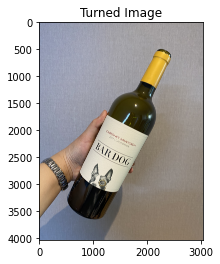

In [ ]:
txtfile = image_fiels[6]
detect_text(txtfile)
img = cv2.imread(image_fiels[6])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Turned Image");

인증샷으로 유명한 포즈인데 잘 읽어내는 것을 보니 걱정이 덜어집니다^______^  

역시 외쳐 갓 구 글

이제 사진 하나를 읽어서 맛을 설명해줄 수 있도록 간단하게 설계해봅시다. 

In [ ]:
############### 첫번째 영문라벨을 읽었을 때 #####################
print(detected_text)

["hu\nFIVE GENERATIONS\nMCMANIS\nFAMILY VINEYARDS'\n2019\nCHARDONNAY\nRIVER JUNCTION AVA\nCALIFORNIA\nEstate - Gro\nCertified Sustainable", 'hu', 'FIVE', 'GENERATIONS', 'MCMANIS', 'FAMILY', 'VINEYARDS', "'", '2019', 'CHARDONNAY', 'RIVER', 'JUNCTION', 'AVA', 'CALIFORNIA', 'Estate', '-', 'Gro', 'Certified', 'Sustainable']


In [ ]:
if 'CHARDONNAY' in detected_text:
    print('이 와인은 CHARDONNAY 입니다.')

간단하게 이런식으로 했으면 좋겠다.

## 회고 

---

- 카카오 ocr 영상을 보니 명함을 찍으면 디텍팅하고 라벨링까지해서 사용할 수 있도록 한것늘 봤다 (써보고 싶었는데 시간상 사용해보지 못해 아쉽다). 그런식으로 위치나 미리 준비한 데이터를 이용해 와인 이름과 품종등을 라벨링해서 따로 관리/저장할 수 있는방법을 쓰면 더 좋은 아이템이 될 것 같다.
- 사진속 글자를 박스를 디텍팅하고 그 박스 안에서 text를 recognition한다고하는데 그게 어떤식으로이뤄지는지 알 수 없어 신기하면서도 구동원리가 궁금했다. 이전 nlp모델은 함수를 직접 작성하고 클래스로 쌓으면서 원리가 이해됐었는데, 이번엔 모델을 그대로 다운받아 쓰니 편하긴 했지만 더 깊숙히들어가지 못해 아쉬웠다.
- 그래도 이번엔 목표가 모델을 이해하기 보단, 주어진 모델로 어떻게 응용해서 사용할 것인지 였기 때문에 거기에 중점을 놓고 진행해서 기존 실습과 다른면으로 더 재밌었다. (그래.. 똑똑한 이과동지들이 만들어 놓으면 난 잘 갖다 쓰면 된다구…..흑)
- 확실히 구글이… 짱이다… 괜히 다들 구글구글하는게 아니더라… 하지만 진행하면서 보니 오히려 성능이 너무 좋아서 의미없는 글자들까지 읽어내 편하게 쓰려면 핵심 오브젝트가 아니면 블러처리를 한다던가 하는추가적인 전처리가 필요할 것 같았다. 다른건 잘 읽기위해 전처리하니 그것보단 낫다…사랑해요 갓구글…. 날데려가….테잌미….
- 이미지처리를하면서 수학적인 부분들이 많이 들어가있음을 느낀다. 차원적인 부분, 박스 디텍팅해서xy값으로 그려주는것들, 하긴 아예 이미지 자체를 numpy 배열로 읽어오니까 수를 다루는 문제로 남어가지… numpy도 공부해야겠다…^_ㅠ
- 이번 실습에선 아예 시작부터 내가 이 실습을 통해 어떤 것을 할건지 큰틀을 목표로 세워놓고 진행했는데, 이렇게 하니까 더 동기부여도 되고 방향성을 갖게되서 좋다! 다음에도 이런식으로 한번 해봐야지~^_^~